In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math
import os

pd.options.display.max_columns = None
pd.options.display.max_rows = None


## Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.


In [2]:
response = requests.get('https://swapi.dev/api/people/')

In [3]:
data = response.json()
data.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [4]:
df = pd.DataFrame(data['results'])
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


In [5]:
data['next']

'https://swapi.dev/api/people/?page=2'

In [8]:
for i in range(1, 10):

    response = requests.get(data['next'])
    data = response.json()
    
    next_page = data['next']

    df = pd.concat([df, pd.DataFrame(data['results'])])

NameError: name 'next_page' is not defined

In [2]:
#assign the api that we requested to a variable
response = requests.get('https://swapi.dev/api/people/')

#Let's look at the type of response we get
response

<Response [200]>

In [3]:
#assign data to the successful response (200)
data = response.json()

#take a look at the json
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [4]:
#create the dataframe  
people_df = pd.DataFrame(data['results'])

#take a look at the dataframe
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        10 non-null     object
 1   height      10 non-null     object
 2   mass        10 non-null     object
 3   hair_color  10 non-null     object
 4   skin_color  10 non-null     object
 5   eye_color   10 non-null     object
 6   birth_year  10 non-null     object
 7   gender      10 non-null     object
 8   homeworld   10 non-null     object
 9   films       10 non-null     object
 10  species     10 non-null     object
 11  vehicles    10 non-null     object
 12  starships   10 non-null     object
 13  created     10 non-null     object
 14  edited      10 non-null     object
 15  url         10 non-null     object
dtypes: object(16)
memory usage: 1.4+ KB


In [5]:
#as long as there is another page..
while data['next'] != None:
    #print that next page
    print(data['next'])
    #make our response variable the api
    response = requests.get(data['next'])
    #with the information from our json 
    data = response.json()
    #now, combine our dataframe with all pages
    people_df = pd.concat([people_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3
https://swapi.dev/api/people/?page=4
https://swapi.dev/api/people/?page=5
https://swapi.dev/api/people/?page=6
https://swapi.dev/api/people/?page=7
https://swapi.dev/api/people/?page=8
https://swapi.dev/api/people/?page=9


In [8]:
people_df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


## Do the same thing, but for planets.


In [9]:
response = requests.get('https://swapi.dev/api/planets/')
data = response.json()

In [10]:
planet_df = pd.DataFrame(data['results'])

In [11]:
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             10 non-null     object
 1   rotation_period  10 non-null     object
 2   orbital_period   10 non-null     object
 3   diameter         10 non-null     object
 4   climate          10 non-null     object
 5   gravity          10 non-null     object
 6   terrain          10 non-null     object
 7   surface_water    10 non-null     object
 8   population       10 non-null     object
 9   residents        10 non-null     object
 10  films            10 non-null     object
 11  created          10 non-null     object
 12  edited           10 non-null     object
 13  url              10 non-null     object
dtypes: object(14)
memory usage: 1.2+ KB


In [12]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    planet_df = pd.concat([planet_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/planets/?page=2
https://swapi.dev/api/planets/?page=3
https://swapi.dev/api/planets/?page=4
https://swapi.dev/api/planets/?page=5
https://swapi.dev/api/planets/?page=6


In [13]:
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             60 non-null     object
 1   rotation_period  60 non-null     object
 2   orbital_period   60 non-null     object
 3   diameter         60 non-null     object
 4   climate          60 non-null     object
 5   gravity          60 non-null     object
 6   terrain          60 non-null     object
 7   surface_water    60 non-null     object
 8   population       60 non-null     object
 9   residents        60 non-null     object
 10  films            60 non-null     object
 11  created          60 non-null     object
 12  edited           60 non-null     object
 13  url              60 non-null     object
dtypes: object(14)
memory usage: 6.7+ KB


## Extract the data for starships.


In [14]:
response = requests.get('https://swapi.dev/api/starships/')
data = response.json()

In [15]:
#turn that into a dataframe
starships_df = pd.DataFrame(data['results'])
#take a look
starships_df.info()
starships_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    10 non-null     object
 1   model                   10 non-null     object
 2   manufacturer            10 non-null     object
 3   cost_in_credits         10 non-null     object
 4   length                  10 non-null     object
 5   max_atmosphering_speed  10 non-null     object
 6   crew                    10 non-null     object
 7   passengers              10 non-null     object
 8   cargo_capacity          10 non-null     object
 9   consumables             10 non-null     object
 10  hyperdrive_rating       10 non-null     object
 11  MGLT                    10 non-null     object
 12  starship_class          10 non-null     object
 13  pilots                  10 non-null     object
 14  films                   10 non-null     object
 15  created  

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [16]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    starships_df = pd.concat([starships_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/starships/?page=2
https://swapi.dev/api/starships/?page=3
https://swapi.dev/api/starships/?page=4


In [17]:
starships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    36 non-null     object
 1   model                   36 non-null     object
 2   manufacturer            36 non-null     object
 3   cost_in_credits         36 non-null     object
 4   length                  36 non-null     object
 5   max_atmosphering_speed  36 non-null     object
 6   crew                    36 non-null     object
 7   passengers              36 non-null     object
 8   cargo_capacity          36 non-null     object
 9   consumables             36 non-null     object
 10  hyperdrive_rating       36 non-null     object
 11  MGLT                    36 non-null     object
 12  starship_class          36 non-null     object
 13  pilots                  36 non-null     object
 14  films                   36 non-null     object
 15  created 

## Save the data in your files to local csv files so that it will be faster to access in the future.


In [19]:
people_df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


In [20]:
planet_df

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000,[https://swapi.dev/api/people/26/],[https://swapi.dev/api/films/2/],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000,[https://swapi.dev/api/people/30/],[https://swapi.dev/api/films/3/],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000,"[https://swapi.dev/api/people/3/, https://swap...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000,"[https://swapi.dev/api/people/34/, https://swa...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:54:13.921000Z,2014-12-20T20:58:18.432000Z,https://swapi.dev/api/planets/9/
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000,"[https://swapi.dev/api/people/22/, https://swa...",[https://swapi.dev/api/films/5/],2014-12-10T12:45:06.577000Z,2014-12-20T20:58:18.434000Z,https://swapi.dev/api/planets/10/


In [21]:
starships_df

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[https://swapi.dev/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/
5,Y-wing,BTL Y-wing,Koensayr Manufacturing,134999,14,1000km,2,0,110,1 week,1.0,80,assault starfighter,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-12T11:00:39.817000Z,2014-12-20T21:23:49.883000Z,https://swapi.dev/api/starships/11/
6,X-wing,T-65 X-wing,Incom Corporation,149999,12.5,1050,1,0,110,1 week,1.0,100,Starfighter,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-12T11:19:05.340000Z,2014-12-20T21:23:49.886000Z,https://swapi.dev/api/starships/12/
7,TIE Advanced x1,Twin Ion Engine Advanced x1,Sienar Fleet Systems,unknown,9.2,1200,1,0,150,5 days,1.0,105,Starfighter,[https://swapi.dev/api/people/4/],[https://swapi.dev/api/films/1/],2014-12-12T11:21:32.991000Z,2014-12-20T21:23:49.889000Z,https://swapi.dev/api/starships/13/
8,Executor,Executor-class star dreadnought,"Kuat Drive Yards, Fondor Shipyards",1143350000,19000,n/a,"279,144",38000,250000000,6 years,2.0,40,Star dreadnought,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-15T12:31:42.547000Z,2014-12-20T21:23:49.893000Z,https://swapi.dev/api/starships/15/
9,Rebel transport,GR-75 medium transport,"Gallofree Yards, Inc.",unknown,90,650,6,90,19000000,6 months,4.0,20,Medium transport,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-15T12:34:52.264000Z,2014-12-20T21:23:49.895000Z,https://swapi.dev/api/starships/17/


In [22]:
people_df.to_csv('sw_people.csv')

In [24]:
starships_df.to_csv('sw_starships.csv')

In [25]:
planet_df.to_csv('sw_planets.csv')

## Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017

In [26]:
germany = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [27]:
germany.sample(10)

,Date,Consumption,Wind,Solar,Wind+Solar
1855,2011-01-30,1228.002,17.861,NaN,NaN
4122,2017-04-15,1154.583,537.558,85.445,623.003
2908,2013-12-18,1447.499,164.438,17.871,182.309
2461,2012-09-27,1349.666,148.215,69.788,218.003
2004,2011-06-28,1383.681,79.015,NaN,NaN
3683,2016-02-01,1533.857,567.769,14.783,582.552
3012,2014-04-01,1478.178,51.836,130.867,182.703
766,2008-02-06,1572.790,NaN,NaN,NaN
993,2008-09-20,1182.659,NaN,NaN,NaN
877,2008-05-27,1398.667,NaN,NaN,NaN


In [28]:
germany = germany.set_index('Date').sort_index()

In [29]:
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


### review

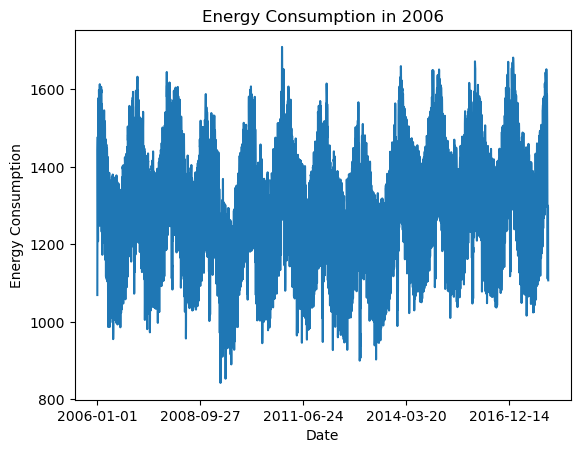

In [32]:
germany.Consumption.plot()
plt.title('Energy Consumption in 2006')
plt.ylabel('Energy Consumption')
plt.show()

## functions made

In [5]:
def get_germany():
    
    if os.path.isfile('germany.csv'):
        
        df = pd.read_csv('germany.csv')

        return df
    
    else:
        
        df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
        
        df.to_csv('germany.csv')

        return df